<a href="https://colab.research.google.com/github/shihab-iiuc/ML-Other-Topics-Learning/blob/main/C221094_Class_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Library


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split


In [ ]:
df=pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
print(f"total number of data:{len(df)}")

total number of data:200


In [ ]:
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


# Outlier detect using IQR method  and Remove it
>
**mainly KNN is sensitive to outliers so we need to deal it**



Identify outliers in 'Annual Income (k$)'



In [ ]:
Q1_income = df['Annual Income (k$)'].quantile(0.25)
Q3_income = df['Annual Income (k$)'].quantile(0.75)
IQR_income = Q3_income - Q1_income

lower_bound_income = Q1_income - 1.5 * IQR_income
upper_bound_income = Q3_income + 1.5 * IQR_income

outliers_income = (df['Annual Income (k$)'] < lower_bound_income) | (df['Annual Income (k$)'] > upper_bound_income)

print(f"Q1 (Annual Income): {Q1_income}")
print(f"Q3 (Annual Income): {Q3_income}")
print(f"IQR (Annual Income): {IQR_income}")
print(f"Lower Bound (Annual Income): {lower_bound_income}")
print(f"Upper Bound (Annual Income): {upper_bound_income}")
print(f"Number of outliers in Annual Income: {outliers_income.sum()}")

Q1 (Annual Income): 41.5
Q3 (Annual Income): 78.0
IQR (Annual Income): 36.5
Lower Bound (Annual Income): -13.25
Upper Bound (Annual Income): 132.75
Number of outliers in Annual Income: 2


Detect Outlier at Spending Score(1-100)



In [ ]:
Q1_spending = df['Spending Score (1-100)'].quantile(0.25)
Q3_spending = df['Spending Score (1-100)'].quantile(0.75)
IQR_spending = Q3_spending - Q1_spending

lower_bound_spending = Q1_spending - 1.5 * IQR_spending
upper_bound_spending = Q3_spending + 1.5 * IQR_spending

outliers_spending = (df['Spending Score (1-100)'] < lower_bound_spending) | (df['Spending Score (1-100)'] > upper_bound_spending)

print(f"Q1 (Spending Score): {Q1_spending}")
print(f"Q3 (Spending Score): {Q3_spending}")
print(f"IQR (Spending Score): {IQR_spending}")
print(f"Lower Bound (Spending Score): {lower_bound_spending}")
print(f"Upper Bound (Spending Score): {upper_bound_spending}")
print(f"Number of outliers in Spending Score: {outliers_spending.sum()}")

Q1 (Spending Score): 34.75
Q3 (Spending Score): 73.0
IQR (Spending Score): 38.25
Lower Bound (Spending Score): -22.625
Upper Bound (Spending Score): 130.375
Number of outliers in Spending Score: 0


In [ ]:
outliers_combined = outliers_income | outliers_spending
initial_rows = len(df)
df_cleaned = df[~outliers_combined]
removed_rows = initial_rows - len(df_cleaned)

print(f"Total initial rows: {initial_rows}")
print(f"Total outliers identified: {outliers_combined.sum()}")
print(f"Total rows after removing outliers: {len(df_cleaned)}")
print(f"Total number of rows removed: {removed_rows}")

Total initial rows: 200
Total outliers identified: 2
Total rows after removing outliers: 198
Total number of rows removed: 2


In [ ]:
print(len(df_cleaned))

198


In [ ]:
x=df_cleaned[['Annual Income (k$)','Spending Score (1-100)']]
print(x.head())

   Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40


#Customers-Before Clustering

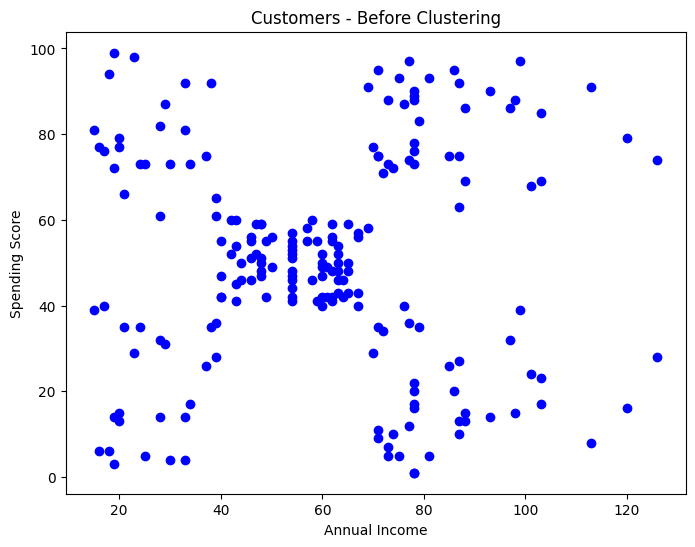

In [ ]:

plt.figure(figsize=(8, 6))
plt.scatter(x['Annual Income (k$)'], x['Spending Score (1-100)'], c='blue')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customers - Before Clustering')
plt.show()

# Try K from 1 to 10

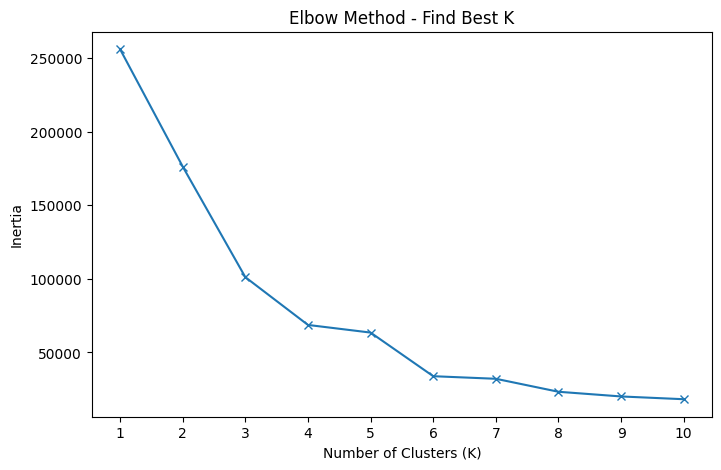

In [ ]:
inertia_list = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x)
    inertia_list.append(kmeans.inertia_)

# Plot the elbow
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia_list, marker='x')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method - Find Best K')
plt.xticks(range(1, 11))
plt.show()



# Create K-Means with 5 clusters

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit the model and get cluster labels
df_cleaned['Cluster'] = kmeans.fit_predict(x)
print("\nFirst 10 customers with their clusters:")
print(df_cleaned.head(10))


First 10 customers with their clusters:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0           1    Male   19                  15                      39        0
1           2    Male   21                  15                      81        2
2           3  Female   20                  16                       6        0
3           4  Female   23                  16                      77        2
4           5  Female   31                  17                      40        0
5           6  Female   22                  17                      76        2
6           7  Female   35                  18                       6        0
7           8  Female   23                  18                      94        2
8           9    Male   64                  19                       3        0
9          10  Female   30                  19                      72        2


/tmp/ipython-input-3965174649.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Cluster'] = kmeans.fit_predict(x)


# Plot with colors for each cluster

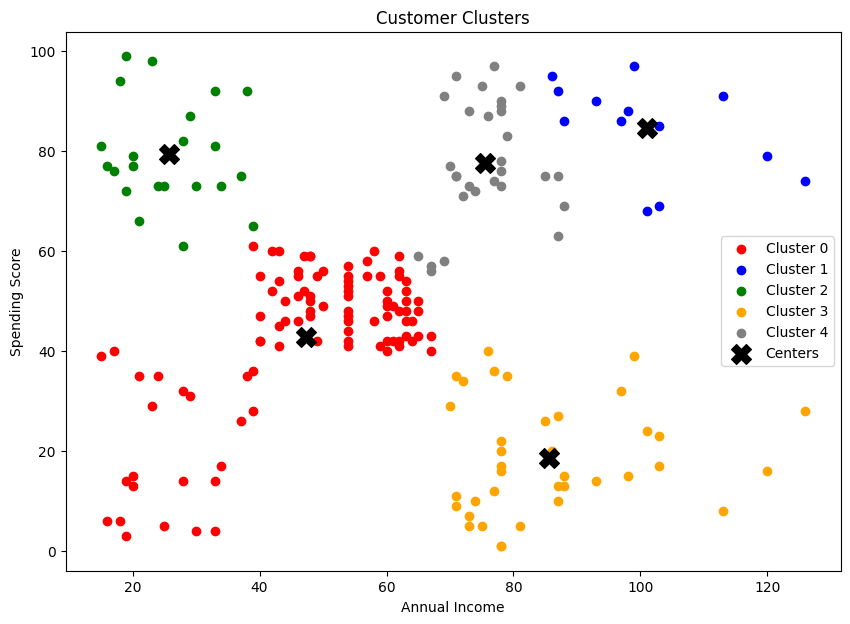

In [ ]:
plt.figure(figsize=(10, 7))

colors = ['red', 'blue', 'green', 'orange','gray']

for i in range(5):
    cluster_data = df_cleaned[df_cleaned['Cluster'] == i]
    plt.scatter(cluster_data['Annual Income (k$)'],
                cluster_data['Spending Score (1-100)'],
                c=colors[i],
                label=f'Cluster {i}')

# Plot cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1],
            c='black', marker='X', s=200, label='Centers')

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Clusters')
plt.legend()
plt.show()

# See average values for each cluster

In [ ]:

cluster_summary = df_cleaned.groupby('Cluster')[['Annual Income (k$)','Spending Score (1-100)']].mean()
cluster_summary = cluster_summary.round(1)

print("Cluster Summary:")
print(cluster_summary)

Cluster Summary:
         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                      47.4                    42.8
1                     101.1                    84.6
2                      25.7                    79.4
3                      85.6                    18.6
4                      75.6                    77.6


# Count customers in each cluster

In [ ]:
print("\nCustomers per cluster:")
print(df_cleaned['Cluster'].value_counts().sort_index())


Customers per cluster:
Cluster
0    97
1    13
2    22
3    37
4    29
Name: count, dtype: int64


#Predict a Customer

In [ ]:
test_a_customer = pd.DataFrame({
    'Annual Income (k$)': [70],
    'Spending Score (1-100)': [60]
})

predicted_cluster = kmeans.predict(test_a_customer)

print(f"The new customer belongs to cluster: {predicted_cluster[0]}")

The new customer belongs to cluster: 4
